In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import kurtosis
import statsmodels.api as sm
import pickle
from scipy.ndimage import gaussian_filter1d


plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Arial"})

In [3]:
# When the disease stop
def day_stop_disease(qua_array):
    count_equal = 0
    for i in range(len(qua_array)):
        if abs(qua_array[i]-qua_array[i+1])==0:
            #print(qua_array[i])
            count_equal+=1
        else:
            count_equal = 0
        if count_equal==10:
            #print("out", i)
            break

    #return(np.argwhere(qua_array == i-count_equal))
    #return qua_array[i-3]
    return i-10
    
def get_df2plot_quarantined(df):
    """
    Input : dataframe
    Output: list to plot of susceptible 
    """
    df2plot_all_2_1000 = []
    df2plot_all_std_2_1000 = []
    awareness_cte_values = np.sort(df["infection-rate"].unique())

    for i in awareness_cte_values: # awareness-cte, find all the values for %awareness-cte

        df2plot_2 = df.loc[(df["infection-rate"]==round(i,2))] 
        #df2plot_2 = df.loc[(df["%awareness-cte"]==round(i,2)) & (df["init-infected"]==init_infected)] 
        df2plot_out_2 = np.zeros(500)
        df2plot_std_2 = np.zeros(500)
        print(df2plot_2)

        for j in np.arange(500):
            df_aux = df2plot_2.loc[(df2plot_2["[step]"].values==j)]
            aux  = df_aux["count turtles with [ isolated? ]"].mean()
            aux2 = df_aux["count turtles with [ isolated? ]"].std()
            df2plot_out_2[j] = aux
            df2plot_std_2[j] = aux2
        #print(aux)
        df2plot_all_2_1000.append(df2plot_out_2)
        df2plot_all_std_2_1000.append(df2plot_std_2)
    return(df2plot_all_2_1000, df2plot_all_std_2_1000)

def str_to_np(str_list):
    # Convert Netlogo list in numpy array
    out_list = str_list[1:-1].split()
    out_list = list(map(int, out_list))
    return out_list

def get_kurtosis_mean_to_plot(dataframe):
    infection_rate_values = np.sort(dataframe["infection-rate"].unique())
    per_test_app          = np.sort(dataframe["%test_app"].unique())

    #print(dataframe)
    print("len inf rates", len(infection_rate_values))
    print("percentage testing", len(per_test_app))

    kurtosis_to_mean = []
    # plt.subplot(4,3,)
    for count, i in enumerate(infection_rate_values):
        print("infection rate", i)
        kurtosis_all_list = []
        kurtosis_mean_list = []
        #kurtosis_all_mean_list = []
        for j in per_test_app:
            df2plot = dataframe.loc[(dataframe["infection-rate"]==round(i,2)) & (dataframe["%test_app"]==j)]
            #print(df2plot)
            data_hist = df2plot["[secondary-cases-live] of turtles with [not susceptible? and not exposed?]"].to_numpy()
            # print(len(data_hist)) # 100

            kurtosis_list = []
            #kurtosis_mean_list = []

            # calculate Kurtosis for each histogram
            for k in data_hist:
                #print(k) 
                kurtosis_list.append(kurtosis(str_to_np(k)))

            # median of 100 kurtosis
            #kurtosis_mean = np.array(kurtosis_list).mean()
            kurtosis_mean = np.median(np.array(kurtosis_list))
            #kurtosis_mean_list.append(np.mean(kurtosis(str_to_np(k))))
            
            #plt.boxplot(kurtosis_list)
            #plt.show()
            kurtosis_all_list.append(kurtosis_list)
            #kurtosis_all_mean_list.append(kurtosis_mean_list)
            kurtosis_mean_list.append(kurtosis_mean)

        kurtosis_to_mean.append(kurtosis_mean_list)
    
    kurtosis_mean_array = np.array(kurtosis_to_mean) 
    #np.shape(np.array(kurtosis_to_mean))

    kurtosis_to_plot = []
    kurtosis_to_plot_std = []

    for i in range(21):
        kurtosis_to_plot.append(kurtosis_mean_array[:,i].mean())
        kurtosis_to_plot_std.append(kurtosis_mean_array[:,i].std())

    kurtosis_to_plot = np.array(kurtosis_to_plot)
    kurtosis_to_plot_std = np.array(kurtosis_to_plot_std)
    return(kurtosis_to_plot, kurtosis_to_plot_std)

In [4]:
def func_mean_histogram(data):
    # input: numpy array from Netlogo count of secondary cases
    # Mean of 10 histograms
    mean_histogram = np.empty([0])

    # Sum all histogram and divide by total repetitions
    for i in range(100):
        print(i)
        """
        #print(i)
        #mean_histogram += str_to_np(data[i])
        zeros_to_fill = 6560 - len(str_to_np(data[i]))
        std_size = np.concatenate([str_to_np(data[i]), np.zeros(zeros_to_fill)])
        print(np.shape(str_to_np(data[i])))
        #print(np.shape(std_size))
        mean_histogram += std_size
        """
        mean_histogram = np.concatenate([mean_histogram, str_to_np(data[i])])
    return mean_histogram[1:]

In [5]:
# States
#df = pd.read_csv("testing_strategy-0.14-7-0.9-0.9-0.csv", skiprows=6)
#df = pd.read_csv("015per-beta015-table.csv", skiprows=6)
df = pd.read_csv("015per-beta012-table.csv", skiprows=6)

In [6]:
len_sim = 600
df2plot_out = np.zeros(len_sim)
df2plot_std = np.zeros(len_sim)

for j in np.arange(len_sim):
    df_aux = df.loc[(df["[step]"].values==j)]
    aux  = df_aux["count turtles with [ isolated? ]"].mean()
    aux2 = df_aux["count turtles with [ isolated? ]"].std()
    df2plot_out[j] = aux
    df2plot_std[j] = aux2

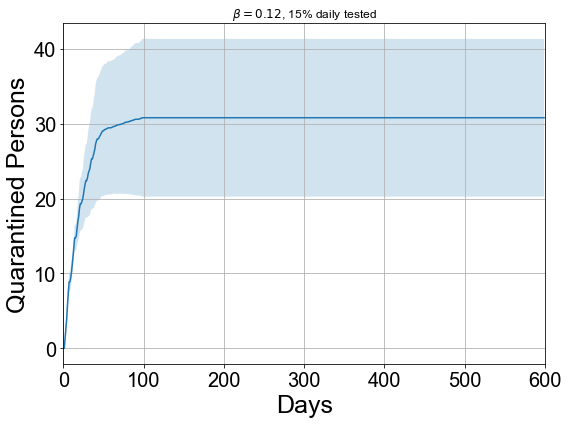

In [7]:
plt.rcParams["figure.figsize"] = 8, 6

plt.plot(df2plot_out)
plt.fill_between(np.arange(len_sim), df2plot_out+df2plot_std, df2plot_out-df2plot_std, alpha=0.2)
plt.title(r"$\beta=0.12$, 15% daily tested")
plt.xlabel("Days", fontsize=25)
plt.ylabel("Quarantined Persons", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, len_sim)
plt.grid()
#plt.legend()

plt.plot()
plt.tight_layout()

#plt.savefig("beta015.pdf")
plt.show()

## Many runs 

In [8]:
#df = pd.read_csv("var_beta2.csv", skiprows=6)
df = pd.read_csv("var_beta-table.csv", skiprows=6) #

In [9]:
df2plot_all_out, df2plot_all_std  = get_df2plot_quarantined(df)

       [run number]  infection-rate  [step]  \
0                 1             0.1       0   
1                 6             0.1       0   
2                 4             0.1       0   
3                 2             0.1       0   
4                 3             0.1       0   
...             ...             ...     ...   
61547           100             0.1     596   
61555           100             0.1     597   
61565           100             0.1     598   
61576           100             0.1     599   
61580           100             0.1     600   

       count turtles with [ susceptible? ]  count turtles with [ isolated? ]  
0                                     9990                                 0  
1                                     9990                                 0  
2                                     9990                                 0  
3                                     9990                                 0  
4                                     99

        [run number]  infection-rate  [step]  \
358741           601            0.16       0   
358748           601            0.16       1   
358756           601            0.16       2   
358762           601            0.16       3   
358768           601            0.16       4   
...              ...             ...     ...   
421907           700            0.16     596   
421913           700            0.16     597   
421923           700            0.16     598   
421934           700            0.16     599   
421942           700            0.16     600   

        count turtles with [ susceptible? ]  count turtles with [ isolated? ]  
358741                                 9990                                 0  
358748                                 9988                                 0  
358756                                 9985                                 0  
358762                                 9985                                 2  
358768                 

new
138
new
162
new
167
new
117
new
156
new
125
new
163
new
139
new
141
new
121
new
139


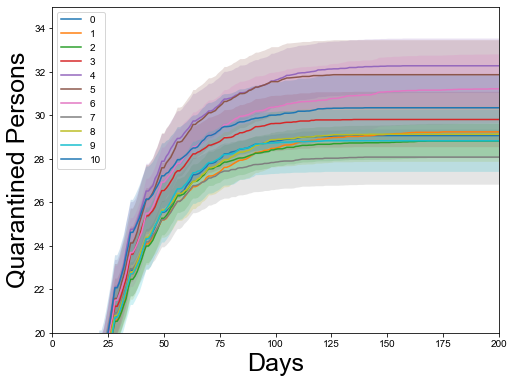

In [10]:
stop_disease_array = []
#stop_disease_std_array = []
x_axis = np.linspace(0,500,500)

for count, var in enumerate(df2plot_all_out):
    plt.plot(var, label=count)
    plt.fill_between(x_axis, var+df2plot_std[count], var-df2plot_std[count], alpha=0.2)

    print("new")
    print(day_stop_disease(var))
    day_stop = day_stop_disease(var)
    stop_disease_array.append(day_stop)
    #stop_disease_std_array.append(df2plot_std[count][day_stop])

plt.ylim(20,35)
plt.xlim(0,200)
plt.xlabel("Days", fontsize=25)
plt.ylabel("Quarantined Persons", fontsize=25)
plt.legend()
plt.show()

In [13]:
count_equal=0
for i in range(599):
    if abs(df2plot_out[i]-df2plot_out[i+1])==0:
        #print("stop in day", i)
        count_equal+=1
    else:
        count_equal=0
    if count_equal==3:
        print("out", i)
        break
        
print("stop in", i-count_equal)

out 58
stop in 55


## Histograms super spreaders

In [15]:
df=[0,0,0,0,0,0]

df[0] = pd.read_csv("0per-beta015-table.csv", skiprows=6, usecols=[0,4])
df[1] = pd.read_csv("5per-beta015-table.csv", skiprows=6, usecols=[0,4])
df[2] = pd.read_csv("10per-beta015-table.csv", skiprows=6, usecols=[0,4])
df[3] = pd.read_csv("15per-beta015-table.csv", skiprows=6, usecols=[0,4])
df[4] = pd.read_csv("20per-beta015-table.csv", skiprows=6, usecols=[0,4])
df[5] = pd.read_csv("25per-beta015-table.csv", skiprows=6, usecols=[0,4])

data = []
for i in range(6):
    data.append(df[i]["[secondary-cases-live] of turtles with [not susceptible? and not exposed?]"].to_numpy())

In [16]:
def func_mean_histogram(data):
    # input: numpy array from Netlogo count of secondary cases
    # Mean of 10 histograms
    mean_histogram = np.empty([0])
    kurtosis_list = []
    
    # Sum all histogram and divide by total repetitions
    for i in range(100):
        #print(i)
        """
        #print(i)
        #mean_histogram += str_to_np(data[i])
        zeros_to_fill = 6560 - len(str_to_np(data[i]))
        std_size = np.concatenate([str_to_np(data[i]), np.zeros(zeros_to_fill)])
        print(np.shape(str_to_np(data[i])))
        #print(np.shape(std_size))
        mean_histogram += std_size
        """
        kurtosis_list.append(kurtosis(str_to_np(data[i])))
        mean_histogram = np.concatenate([mean_histogram, str_to_np(data[i])])
       
    #return (mean_histogram[1:], np.array(kurtosis_list).mean())
    return (mean_histogram[1:], kurtosis_list)

0
1
2
3
4
5


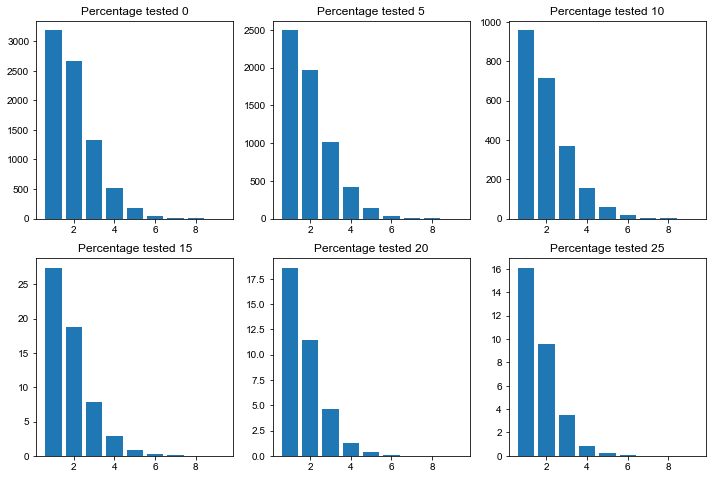

In [17]:
plt.rcParams["figure.figsize"] = 12, 8
kurtosis_list = []
kurtosis_mean_list = []

# Plot the histograms
for i in range(6):
    print(i)
    plt.subplot(2,3,i+1)
    mean_histogram, kurtosis_temp_list = func_mean_histogram(data[i])
    kurtosis_list.append(kurtosis_temp_list)
    #kurtosis_mean_list.append(np.array(kurtosis_temp_list).mean())
    kurtosis_mean_list.append(np.median(np.array(kurtosis_temp_list))) # more representative
    
    
    # We calculate the histogram
    freq, bins = np.histogram(mean_histogram, bins=range(10))
    
    #print(kurtosis_mean)
    #kurtosis_list.append(kurtosis_mean)
    plt.bar(bins[1:], freq/100) # divide by 100 because is the mean of 100 histograms
    plt.title("Percentage tested {}".format(i*5))
plt.show()

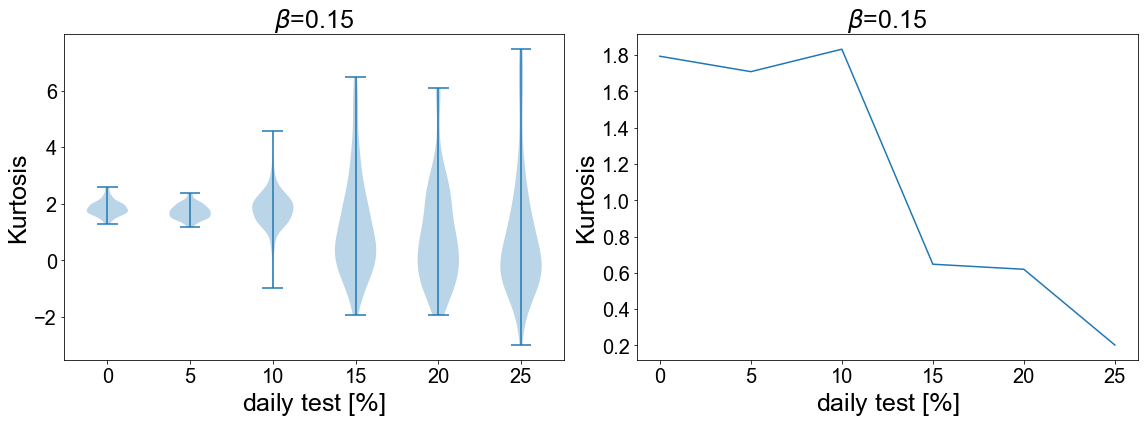

In [18]:
plt.rcParams["figure.figsize"] = 16, 6

plt.subplot(1,2,1)
#plt.plot(np.linspace(0, 20, 5), kurtosis_list)
#plt.boxplot(kurtosis_list)
plt.violinplot(kurtosis_list)

plt.title(r"$\beta$={}".format(0.15),size=25)
plt.xlabel("daily test [$\%$]", size=25)
plt.ylabel("Kurtosis", size=25)
plt.xticks(fontsize=20)
plt.xticks([1, 2, 3,4,5, 6], [0,5,10, 15, 20,25])
plt.yticks(fontsize=20)
#plt.show()
# sin promedio kurtosis

plt.subplot(1,2,2)
plt.plot(np.linspace(0, 25, 6), kurtosis_mean_list)
#plt.boxplot(kurtosis_list)
plt.title(r"$\beta$={}".format(0.15), size=25)
plt.xlabel("daily test [$\%$]", size=25)
plt.ylabel("Kurtosis", size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

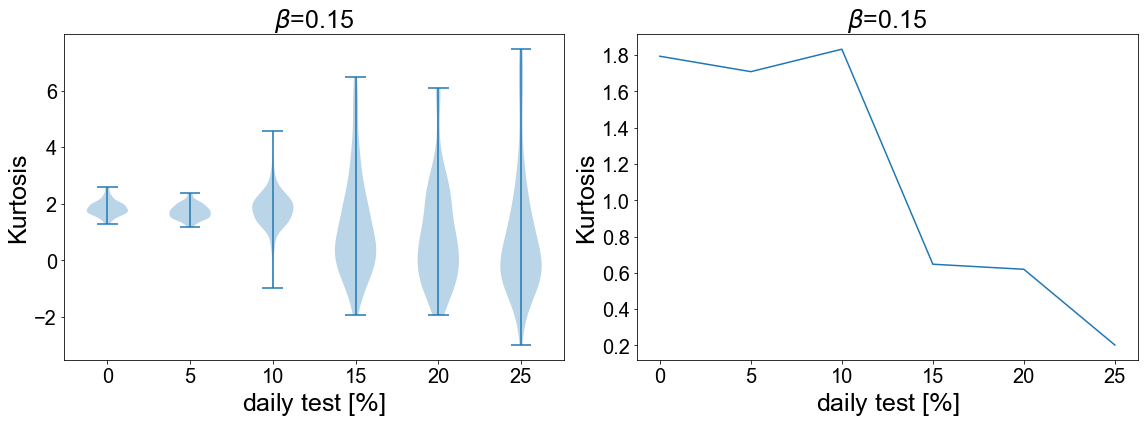

In [19]:
plt.rcParams["figure.figsize"] = 16, 6

plt.subplot(1,2,1)
#plt.plot(np.linspace(0, 20, 5), kurtosis_list)
#plt.boxplot(kurtosis_list)
plt.violinplot(kurtosis_list)

plt.title(r"$\beta$={}".format(0.15),size=25)
plt.xlabel("daily test [$\%$]", size=25)
plt.ylabel("Kurtosis", size=25)
plt.xticks(fontsize=20)
plt.xticks([1, 2, 3,4,5, 6], [0,5,10, 15, 20,25])
plt.yticks(fontsize=20)
#plt.show()
# sin promedio kurtosis

plt.subplot(1,2,2)
plt.plot(np.linspace(0, 25, 6), kurtosis_mean_list)
#plt.boxplot(kurtosis_list)
plt.title(r"$\beta$={}".format(0.15), size=25)
plt.xlabel("daily test [$\%$]", size=25)
plt.ylabel("Kurtosis", size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

## Massive plots

In [20]:
df= pd.read_csv("testing_strategy.csv", skiprows=6, usecols=[1,2,6])

### Kurtosis box plots
We show all the kurtosis produces for each histogram. Each infection rate $\beta$ has been run with tested percentage of people from $0\%$ to $20\%$ of the population daily.

10
21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2


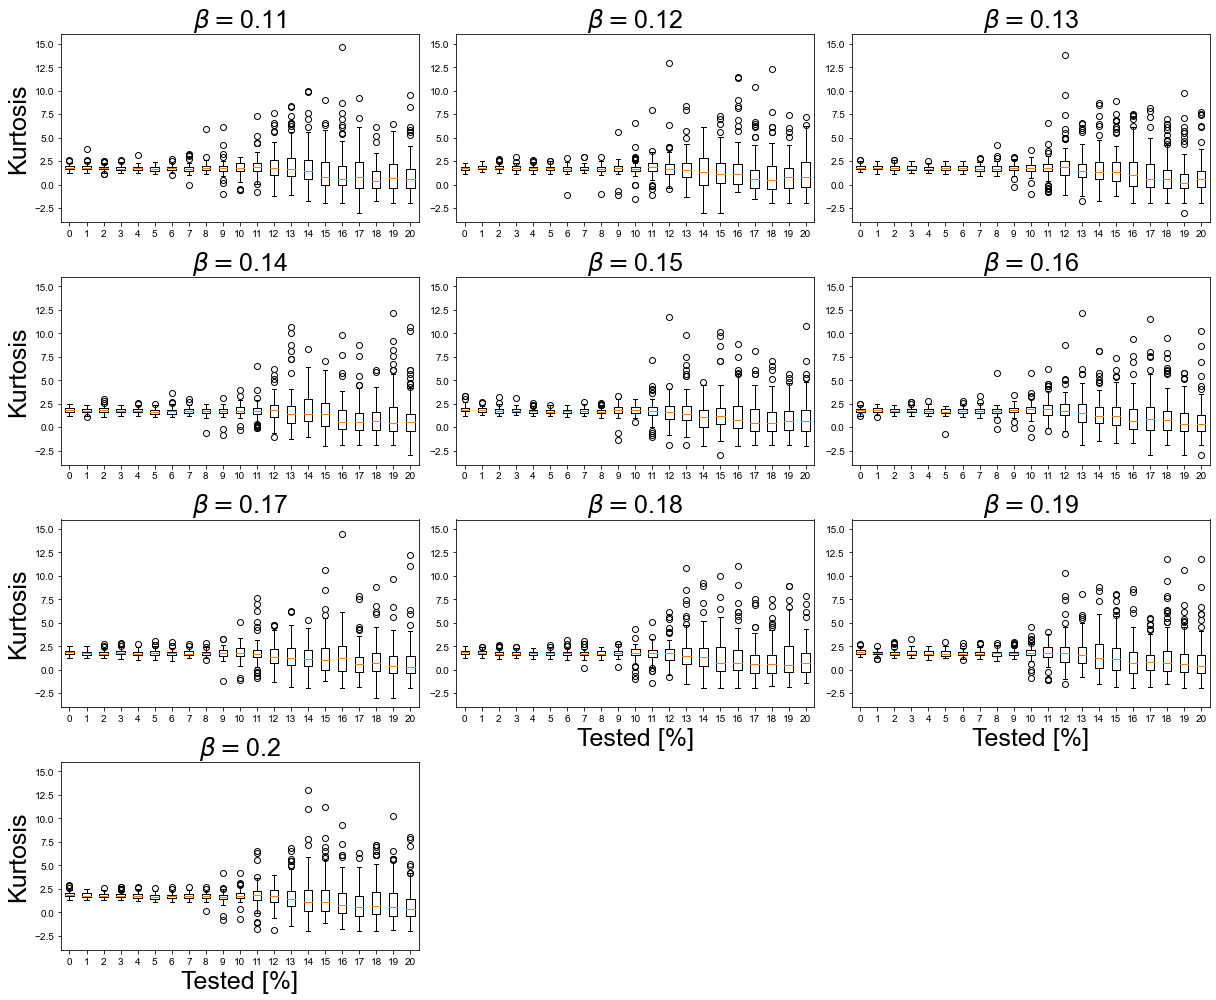

In [21]:
plt.rcParams["figure.figsize"] = 17, 14

infection_rate_values = np.sort(df["infection-rate"].unique())
per_test_app          = np.sort(df["%test_app"].unique())

print(len(infection_rate_values))
print(len(per_test_app))


# plt.subplot(4,3,)
for count, i in enumerate(infection_rate_values):
    print("infection rate", i)
    kurtosis_all_list = []
    kurtosis_mean_list = []
    #kurtosis_all_mean_list = []
    for j in per_test_app:
        df2plot = df.loc[(df["infection-rate"]==round(i,2)) & (df["%test_app"]==j)]
        #print(df2plot)
        data_hist = df2plot["[secondary-cases-live] of turtles with [not susceptible? and not exposed?]"].to_numpy()
        # print(len(data_hist)) # 100
        
        kurtosis_list = []
        #kurtosis_mean_list = []
        
        # calculate Kurtosis for each histogram
        for k in data_hist:
            #print(k) 
            kurtosis_list.append(kurtosis(str_to_np(k)))
        
        # mean of 100 kurtosis
        #kurtosis_mean = np.array(kurtosis_list).mean()
        kurtosis_mean = np.median(np.array(kurtosis_list)) # median is more representative
        kurtosis_all_list.append(kurtosis_list)
        kurtosis_mean_list.append(kurtosis_mean)
    
    plt.subplot(4,3,count+1)
    plt.boxplot(kurtosis_all_list)
    #plt.violinplot(kurtosis_all_list)
    plt.title(r"$\beta=${}".format(i), fontsize=25)
    plt.xticks(np.arange(1, 22), np.arange(21))
    plt.ylim(-4, 16)
        
    if count==0 or count==3 or count==6 or count==9:
        plt.ylabel("Kurtosis", size=25)
    if count==7 or count==8 or count==9 or count==10:
        plt.xlabel("Tested [%]", size=25)
    
    #plt.ylabel("Kurtosis", size=25)
    #plt.xlabel("% tested", size=25)
    #plt.show()
    #plt.plot(kurtosis_mean_list)
    #plt.ylabel("Kurtosis", size=25)
    #plt.xlabel("% tested", size=25)
    #plt.show()
plt.tight_layout()
#plt.savefig("kurtosis_box_plot_all.pdf")
plt.show()

### Kurtosis median plot
Here we show the median of the kurtosis for 100 repetitions. It's the same data and shown in "Box plot", but only the median instead of all the data.

10
21
infection rate 0.11


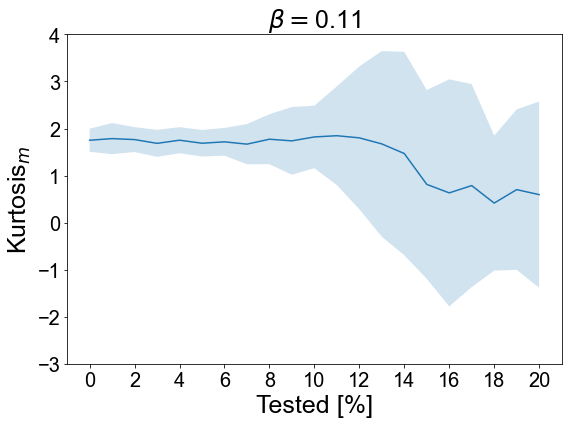

infection rate 0.12


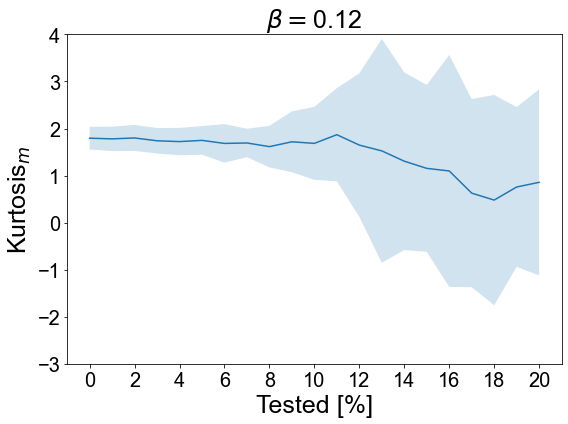

infection rate 0.13


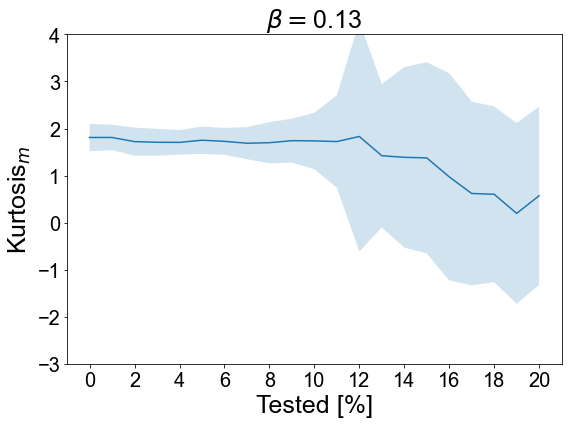

infection rate 0.14


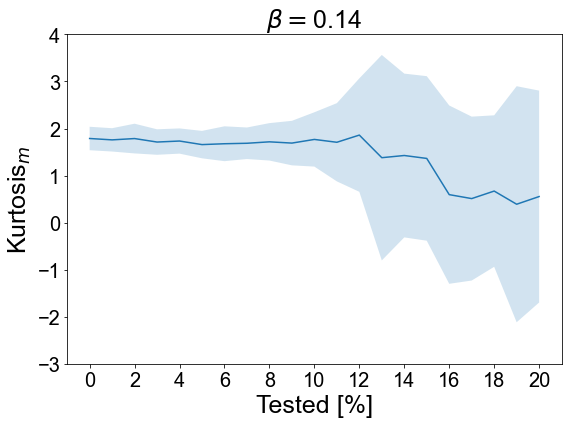

infection rate 0.15


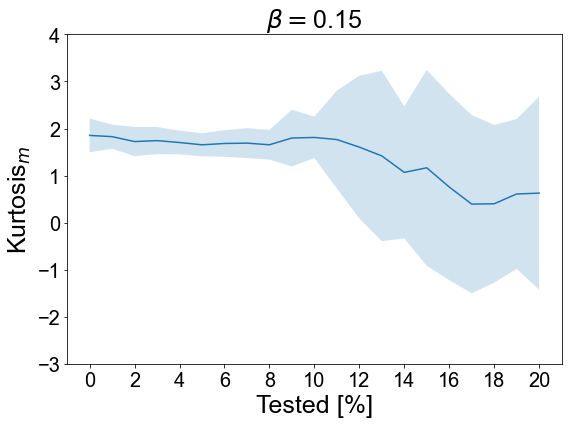

infection rate 0.16


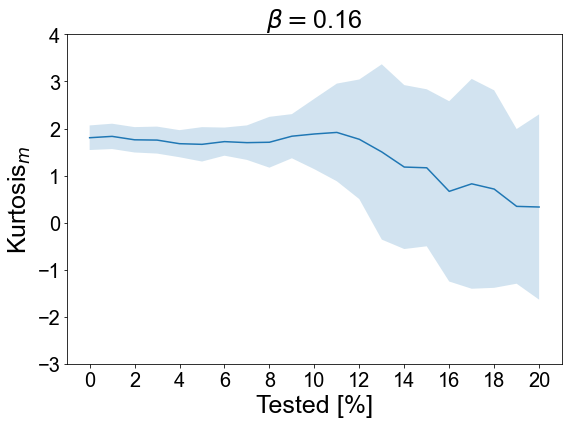

infection rate 0.17


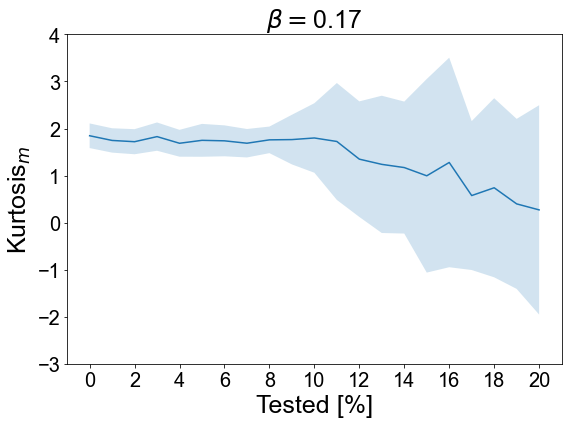

infection rate 0.18


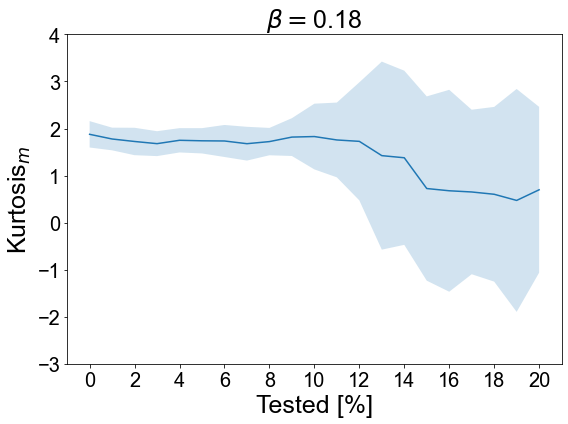

infection rate 0.19


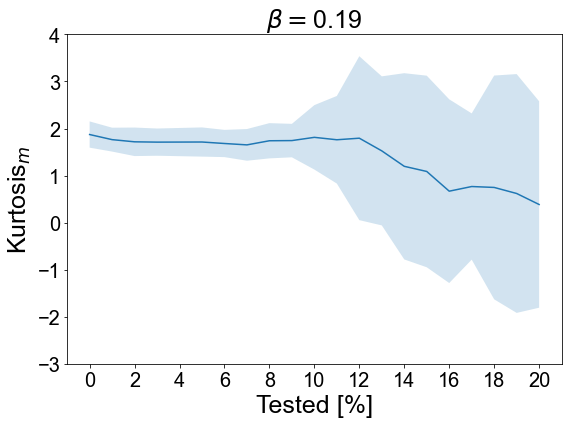

infection rate 0.2


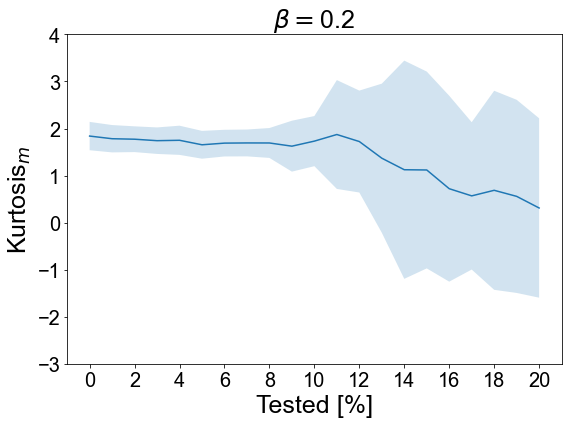

In [22]:
plt.rcParams["figure.figsize"] = 8, 6

infection_rate_values = np.sort(df["infection-rate"].unique())
per_test_app          = np.sort(df["%test_app"].unique())

print(len(infection_rate_values))
print(len(per_test_app))


# plt.subplot(4,3,)
for count, i in enumerate(infection_rate_values):
    print("infection rate", i)
    kurtosis_all_list = []
    kurtosis_mean_list = []
    kurtosis_mean_std_list = []
    #kurtosis_all_mean_list = []
    for j in per_test_app:
        df2plot = df.loc[(df["infection-rate"]==round(i,2)) & (df["%test_app"]==j)]
        #print(df2plot)
        data_hist = df2plot["[secondary-cases-live] of turtles with [not susceptible? and not exposed?]"].to_numpy()
        # print(len(data_hist)) # 100
        
        kurtosis_list = []
        #kurtosis_mean_list = []
        
        # calculate Kurtosis for each histogram
        for k in data_hist:
            #print(k) 
            kurtosis_list.append(kurtosis(str_to_np(k)))
        
        # mean of 100 kurtosis
        #kurtosis_mean = np.array(kurtosis_list).mean()
        kurtosis_mean = np.median(np.array(kurtosis_list))
        #kurtosis_mean_list.append(np.mean(kurtosis(str_to_np(k))))
        kurtosis_mean_std = np.std(np.array(kurtosis_list))
            
        #plt.boxplot(kurtosis_list)
        #plt.show()
        kurtosis_all_list.append(kurtosis_list)
        #kurtosis_all_mean_list.append(kurtosis_mean_list)
        kurtosis_mean_list.append(kurtosis_mean)
        kurtosis_mean_std_list.append(kurtosis_mean_std)
        #print(kurtosis_mean_std)
    
    #plt.subplot(4,3,count+1)
    #plt.subplot(5,2,count+1)
    plt.plot(kurtosis_mean_list)
    #print(kurtosis_mean_std_list)
    plt.fill_between(range(21), np.array(kurtosis_mean_list)+np.array(kurtosis_mean_std_list), np.array(kurtosis_mean_list)-np.array(kurtosis_mean_std_list), alpha=0.2)
    
    plt.title(r"$\beta=${}".format(i), fontsize=25)
    
    # Set position and labels of xticks
    locsx, labelsx = plt.xticks()
    plt.draw()
    labelsx_array = np.arange(0,22,2)
    plt.xticks(np.arange(0,22,2), labelsx_array)
    #plt.boxplot(kurtosis_all_list)
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    #plt.ylim(0.20, 1.95)
        
    #if count==0 or count==2 or count==4 or count==6 or count==8:
    #    plt.ylabel("Kurtosis$_m$", size=25)
    #if count==8 or count==9:# or count==10:
    #    plt.xlabel("Tested [%]", size=25)
    plt.ylabel("Kurtosis$_m$", size=25)
    plt.xlabel("Tested [%]", size=25)
    
    plt.ylim(-3,4)
    
    #plt.ylabel("Kurtosis", size=25)
    #plt.xlabel("% tested", size=25)
    #plt.show()
    #plt.plot(kurtosis_mean_list)
    #plt.ylabel("Kurtosis", size=25)
    #plt.xlabel("% tested", size=25)
    #plt.show()
    
    plt.tight_layout()
    #plt.savefig("kurtosis_median_plot_all{}.pdf".format(i))
    plt.show()

### All the median of Kurtosis in one plot

10
21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2


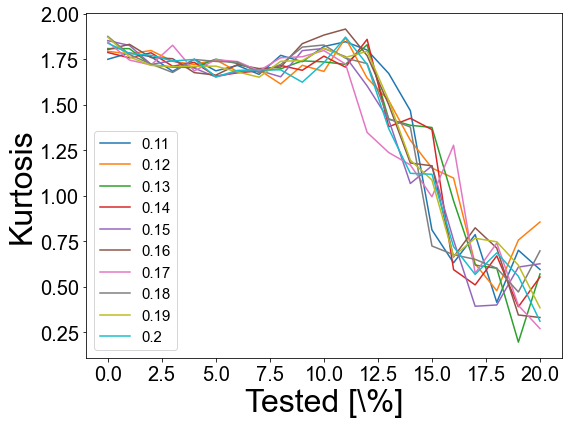

In [23]:
plt.rcParams["figure.figsize"] = 8, 6

infection_rate_values = np.sort(df["infection-rate"].unique())
per_test_app          = np.sort(df["%test_app"].unique())

print(len(infection_rate_values))
print(len(per_test_app))


# plt.subplot(4,3,)
for count, i in enumerate(infection_rate_values):
    print("infection rate", i)
    kurtosis_all_list = []
    kurtosis_mean_list = []
    #kurtosis_all_mean_list = []
    for j in per_test_app:
        df2plot = df.loc[(df["infection-rate"]==round(i,2)) & (df["%test_app"]==j)]
        #print(df2plot)
        data_hist = df2plot["[secondary-cases-live] of turtles with [not susceptible? and not exposed?]"].to_numpy()
        # print(len(data_hist)) # 100
        
        kurtosis_list = []
        #kurtosis_mean_list = []
        
        # calculate Kurtosis for each histogram
        for k in data_hist:
            #print(k) 
            kurtosis_list.append(kurtosis(str_to_np(k)))
        
        # median of 100 kurtosis
        #kurtosis_mean = np.array(kurtosis_list).mean()
        kurtosis_mean = np.median(np.array(kurtosis_list))
        #kurtosis_mean_list.append(np.mean(kurtosis(str_to_np(k))))
            
        #plt.boxplot(kurtosis_list)
        #plt.show()
        kurtosis_all_list.append(kurtosis_list)
        #kurtosis_all_mean_list.append(kurtosis_mean_list)
        kurtosis_mean_list.append(kurtosis_mean)
    
    plt.plot(kurtosis_mean_list, label=i)
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel("Kurtosis", size=32)
plt.xlabel("Tested [\%]", size=32)
plt.tight_layout()
#labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend(fontsize=15)
#plt.savefig("kurtosis.pdf")
plt.show()

In [24]:
# Mean of al Kurtosis
plt.rcParams["figure.figsize"] = 8, 6

infection_rate_values = np.sort(df["infection-rate"].unique())
per_test_app          = np.sort(df["%test_app"].unique())

print(len(infection_rate_values))
print(len(per_test_app))

kurtosis_to_mean = []
# plt.subplot(4,3,)
for count, i in enumerate(infection_rate_values):
    print("infection rate", i)
    kurtosis_all_list = []
    kurtosis_mean_list = []
    #kurtosis_all_mean_list = []
    for j in per_test_app:
        df2plot = df.loc[(df["infection-rate"]==round(i,2)) & (df["%test_app"]==j)]
        #print(df2plot)
        data_hist = df2plot["[secondary-cases-live] of turtles with [not susceptible? and not exposed?]"].to_numpy()
        # print(len(data_hist)) # 100
        
        kurtosis_list = []
        #kurtosis_mean_list = []
        
        # calculate Kurtosis for each histogram
        for k in data_hist:
            #print(k) 
            kurtosis_list.append(kurtosis(str_to_np(k)))
        
        # median of 100 kurtosis
        #kurtosis_mean = np.array(kurtosis_list).mean()
        kurtosis_mean = np.median(np.array(kurtosis_list))
        #kurtosis_mean_list.append(np.mean(kurtosis(str_to_np(k))))
        
        """
        print("kur list",len(kurtosis_list))
        # lowess
        lowess = sm.nonparametric.lowess
        kurtosis_mean = lowess(np.array(kurtosis_list), np.linspace(0,20,21))
        """
            
        #plt.boxplot(kurtosis_list)
        #plt.show()
        kurtosis_all_list.append(kurtosis_list)
        #kurtosis_all_mean_list.append(kurtosis_mean_list)
        kurtosis_mean_list.append(kurtosis_mean)
    
    kurtosis_to_mean.append(kurtosis_mean_list)

10
21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2


In [25]:
kurtosis_mean_array = np.array(kurtosis_to_mean) 
#np.shape(np.array(kurtosis_to_mean))

kurtosis_to_plot = []
kurtosis_to_plot_std = []

for i in range(21):
#    kurtosis_to_plot.append(kurtosis_mean_array[:,i].mean())
    kurtosis_to_plot_std.append(kurtosis_mean_array[:,i].std())

kurtosis_mean_array_flat = np.reshape(kurtosis_mean_array,(1,-1))[0]
x_axis = np.tile(np.linspace(0,20,21), 10)
print(kurtosis_mean_array_flat)
lowess = sm.nonparametric.lowess

kurtosis_to_plot.append(lowess(kurtosis_mean_array_flat, x_axis, frac=1))

#print(len(kurtosis_mean_array[:,i]))
# lowess
#lowess = sm.nonparametric.lowess
#kurtosis_to_plot.append(lowess(kurtosis_mean_array[0], np.linspace(0,20,21)))
    
    #kurtosis_to_plot.append(kurtosis_mean_array[:,i].mean())
    #kurtosis_to_plot_std.append(kurtosis_mean_array[:,i].std())


kurtosis_to_plot = np.array(kurtosis_to_plot)
kurtosis_to_plot_std = np.array(kurtosis_to_plot_std)
print(kurtosis_to_plot)

[1.75073247 1.78541266 1.76506058 1.68467283 1.75142172 1.68732044
 1.71702373 1.667969   1.77252242 1.73745131 1.82112598 1.8469996
 1.80153286 1.6728585  1.468624   0.81310895 0.6322225  0.78726183
 0.41524918 0.70130542 0.59537068 1.79452669 1.78011002 1.79911322
 1.73972464 1.72199497 1.74786234 1.68329566 1.6926888  1.61488226
 1.7178113  1.68405776 1.86858146 1.64774486 1.52471491 1.30552201
 1.15305113 1.09814403 0.62684557 0.47905562 0.75720813 0.85653189
 1.80968015 1.80930355 1.72137759 1.70764262 1.70537548 1.75150357
 1.72733895 1.68741855 1.69834085 1.74210868 1.73649154 1.72279715
 1.83078409 1.4216056  1.38814383 1.37613495 0.97278128 0.61973147
 0.6022771  0.19636013 0.57151959 1.78799261 1.75865035 1.78653729
 1.71255528 1.73398863 1.65823038 1.67643565 1.68647107 1.7170253
 1.69031149 1.76807636 1.70760137 1.86025614 1.37998587 1.42652847
 1.3642656  0.59488295 0.51087783 0.67082088 0.39088292 0.55423329
 1.85339481 1.8269757  1.72285037 1.74292098 1.70225109 1.653604

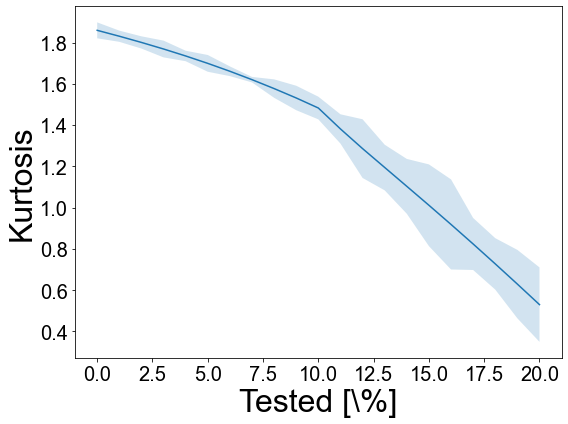

In [26]:
plt.plot(kurtosis_to_plot[0][:,0], kurtosis_to_plot[0][:,1])
plt.fill_between(range(21), kurtosis_to_plot[0][:,1][::10]+kurtosis_to_plot_std, 
                 kurtosis_to_plot[0][:,1][::10]-kurtosis_to_plot_std, alpha=0.2)
 
#plt.fill_between(range(21), kurtosis_to_plot+kurtosis_to_plot_std, kurtosis_to_plot-kurtosis_to_plot_std, alpha=0.2)
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel("Kurtosis", size=32)
plt.xlabel("Tested [\%]", size=32)
plt.tight_layout()
#labelLines(plt.gca().get_lines(),zorder=2.5)
#plt.legend()
#plt.savefig("kurtosis_mean.pdf")
plt.show()

## Delay 1-7 day

In [27]:
df = []
df.append(pd.read_csv("testing_strategy.csv", skiprows=6, usecols=[1,2,6]))
df.append(pd.read_csv("testing_strategy-1delay.csv", skiprows=6, usecols=[1,2,7]))
df.append(pd.read_csv("testing_strategy-2delay.csv", skiprows=6, usecols=[1,2,7]))
df.append(pd.read_csv("testing_strategy-3delay.csv", skiprows=6, usecols=[1,2,7]))
df.append(pd.read_csv("testing_strategy-4delay.csv", skiprows=6, usecols=[1,2,7]))
df.append(pd.read_csv("testing_strategy-5delay.csv", skiprows=6, usecols=[1,2,7]))
df.append(pd.read_csv("testing_strategy-6delay.csv", skiprows=6, usecols=[1,2,7]))
df.append(pd.read_csv("testing_strategy-7delay.csv", skiprows=6, usecols=[1,2,7]))

In [28]:
%%time
kurtosis_to_plot_array = [0,0,0,0,0,0,0,0]
kurtosis_to_plot_std_array = [0,0,0,0,0,0,0,0]

for i in range(8):
    kurtosis_to_plot_array[i], kurtosis_to_plot_std_array[i] = get_kurtosis_mean_to_plot(df[i])

len inf rates 10
percentage testing 21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2
len inf rates 10
percentage testing 21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2
len inf rates 10
percentage testing 21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2
len inf rates 10
percentage testing 21
infection rate 0.11
infection rate 0.12
infection rate 0.13
infection rate 0.14
infection rate 0.15
infection rate 0.16
infection rate 0.17
infection rate 0.18
infection rate 0.19
infection rate 0.2
len inf rates 10
percentage testing 21
infection

In [29]:
pickle.dump([kurtosis_to_plot_array, kurtosis_to_plot_std_array], open("kurtosis_array.pkl", "wb"))

In [30]:
kurtosis_to_plot_array, kurtosis_to_plot_std_array = pickle.load(open("kurtosis_array.pkl", "rb"))

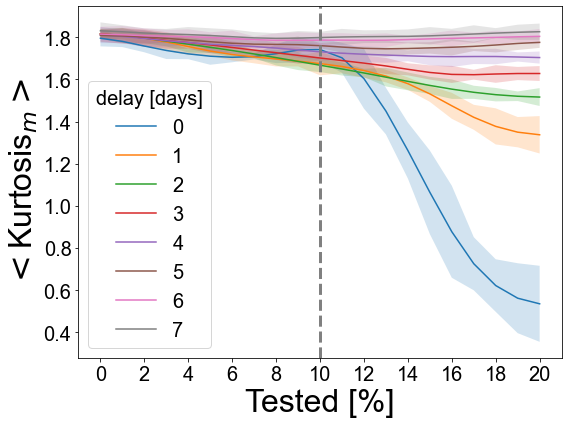

In [31]:
plt.rcParams["figure.figsize"] = 8, 6

for i in range(8):
    #plt.plot(kurtosis_to_plot_array[i], label=i)
    #plt.fill_between(range(21), kurtosis_to_plot_array[i]+kurtosis_to_plot_std_array[i], kurtosis_to_plot_array[i]-kurtosis_to_plot_std_array[i], alpha=0.2)
    plt.plot(gaussian_filter1d(kurtosis_to_plot_array[i], 1.5), label=i)
    plt.fill_between(range(21), gaussian_filter1d(kurtosis_to_plot_array[i], 1.5)+kurtosis_to_plot_std_array[i], gaussian_filter1d(kurtosis_to_plot_array[i], 1.5)-kurtosis_to_plot_std_array[i], alpha=0.2)

# straight line
plt.axvline(x=10, color='grey', linestyle='--', linewidth=3)
# Set position and labels of xticks
locsx, labelsx = plt.xticks()
plt.draw()
labelsx_array = np.arange(0,22,2)
plt.xticks(np.arange(0,22,2), labelsx_array)

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$<$Kurtosis$_m>$", size=32)
plt.xlabel("Tested [%]", size=32)
plt.tight_layout()
#labelLines(plt.gca().get_lines(),zorder=2.5)
plt.legend(title="delay [days]", fontsize=20, title_fontsize=20)
#plt.savefig("kurtosis_mean_array.pdf")
plt.savefig("kurtosis_gauss_mean_array.pdf")
plt.show()

# We calculate the histogram
freq, bins = np.histogram(mean_histogram, bins=range(11))

In [32]:
# Calculate the kurtosis of histogram, higher values mean bigger tails
kurtosis(mean_histogram) # 1.429622 laaargo, cort 1.6169

2.364250490145478

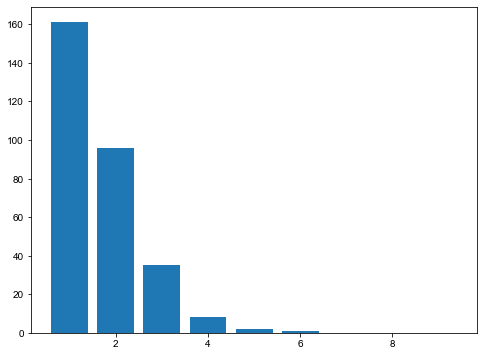

In [33]:
# kurtosis 1.4296222912017438
plt.bar(bins[1:], freq/10) # divide by 10 because is the mean of 10 histograms
plt.show()

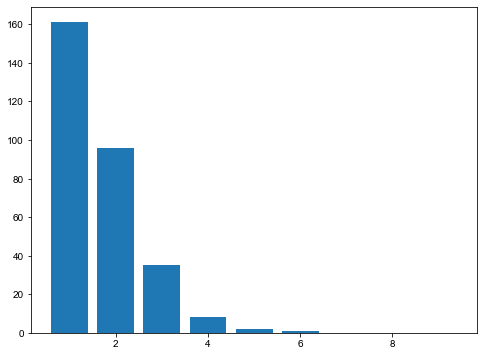

In [34]:
# kurtosis 1.6169
plt.bar(bins[1:], freq/10) # divide by 10 because is the mean of 10 histograms
plt.show()